In [29]:
from   faraway.datasets import galapagos, odor
import faraway.utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 6. Example

In [2]:
data = galapagos.load()
data.head()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


In [3]:
lmod = smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz + Adjacent',
    data=data
).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           6.84e-07
Time:                        16:44:42   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.715     -32.464      46.601
Area          -0.0239      0.022     -1.068      0.296      -0.070       0.022
Elevation      0.3195      0.054      5.953      0.000       0.209       0.430
Nearest        0.0091      1.054      0.009      0.993      -2.166       2.185
Scruz         -0.2405      0.215     -1.117      0.275      -0.685       0.204
Adjacent      -0.0748      0.018     -4.226      0.000      -0.111      -0.038
==============================================================================
Omnibus:                       12.683   Durbin-Watson:                   2.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.498
Skew:                           1.136   Prob(JB):                      0.00117
Kurtosis:                       5.374   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.024  0.022   -1.07  0.2963
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.075  0.018   -4.23  0.0003

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [5]:
X = data.iloc[:, 1:]
X.insert(0, 'intercept', 1)
XTXi = np.linalg.inv(X.T @ X) # expensive!
hat = XTXi @ X.T

In [6]:
coefs = hat @ data.Species
coefs

0    7.068221
1   -0.023938
2    0.319465
3    0.009144
4   -0.240524
5   -0.074805
dtype: float64

In [7]:
# Somewhat better
# Ax = b; solve(A, b) returns x
np.linalg.solve(X.T @ X, X.T @ data.Species)

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [8]:
lmod.resid

Baltra          -58.725946
Bartolome        38.273154
Caldwell        -26.330659
Champion         14.635734
Coamano          38.383916
Daphne.Major    -25.087705
Daphne.Minor     -9.919668
Darwin           19.018992
Eden            -20.314202
Enderby         -28.785943
Espanola         49.343513
Fernandina       -3.989598
Gardner1         62.033276
Gardner2        -59.633796
Genovesa         40.497176
Isabela         -39.403558
Marchena        -37.694540
Onslow           -2.037233
Pinta          -111.679486
Pinzon          -42.475375
Las.Plazas      -23.075807
Rabida           -5.553122
SanCristobal     73.048122
SanSalvador     -40.676318
SantaCruz       182.583587
SantaFe         -23.376486
SantaMaria       89.383371
Seymour          -5.805095
Tortuga         -36.935732
Wolf             -5.700573
dtype: float64

In [9]:
lmod.fittedvalues

Baltra          116.725946
Bartolome        -7.273154
Caldwell         29.330659
Champion         10.364266
Coamano         -36.383916
Daphne.Major     43.087705
Daphne.Minor     33.919668
Darwin           -9.018992
Eden             28.314202
Enderby          30.785943
Espanola         47.656487
Fernandina       96.989598
Gardner1         -4.033276
Gardner2         64.633796
Genovesa         -0.497176
Isabela         386.403558
Marchena         88.694540
Onslow            4.037233
Pinta           215.679486
Pinzon          150.475375
Las.Plazas       35.075807
Rabida           75.553122
SanCristobal    206.951878
SanSalvador     277.676318
SantaCruz       261.416413
SantaFe          85.376486
SantaMaria      195.616629
Seymour          49.805095
Tortuga          52.935732
Wolf             26.700573
dtype: float64

In [10]:
lmod.df_resid

24.0

In [11]:
lmod.ssr # RSS

89231.36633005121

In [12]:
np.sqrt(lmod.mse_resid) # RMSE

60.97518837269359

## 7. Computing Least Squares Estimates

In [13]:
# moore-penrose inverse
Xmp = np.linalg.pinv(X)
Xmp.shape

(6, 30)

In [14]:
# method used by statsmodels
Xmp @ data.Species

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [15]:
# method used by R (QR decomp)
q, r = np.linalg.qr(X)
f = q.T @ data.Species
f

array([-466.84219318,  381.40557435,  256.25047255,    5.40764552,
       -119.49834019,  257.69436853])

In [16]:
sp.linalg.solve_triangular(r, f)

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

In [17]:
# force QR in statmodels
lm_form = smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz + Adjacent',
    data=data)
lm = lm_form.fit(method='qr')
lm.params

Intercept    7.068221
Area        -0.023938
Elevation    0.319465
Nearest      0.009144
Scruz       -0.240524
Adjacent    -0.074805
dtype: float64

In [18]:
# Alternately (uses SVD decomp)
params, res, rnk, s = sp.linalg.lstsq(X, data.Species)
params

array([ 7.06822071, -0.02393834,  0.31946476,  0.00914396, -0.24052423,
       -0.07480483])

## 9. Goodness of Fit

In [19]:
x = np.linspace(0, 1, 201)
np.random.seed(111)
y = x + np.random.normal(0, 0.1, 201)

In [20]:
beta1, beta0 = np.polyfit(x, y, 1)

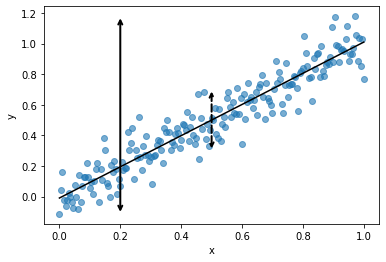

In [21]:
plt.scatter(x, y, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.plot([0, 1], [beta0, beta0 + beta1], 'k-')
plt.annotate(
    '',
    xy=(0.2, min(y)),
    xytext=(0.2, max(y)),
    arrowprops={'arrowstyle': '<->', 'lw': 2})
plt.annotate(
    '',
    xy=(0.5, 0.3), 
    xytext=(0.5, 0.7),
    arrowprops={'arrowstyle': '<->', 'linestyle': '--', 'lw': 2});

## 10. Identifiability

In [22]:
data['Adiff'] = data.Area - data.Adjacent

In [23]:
lmodform = smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz + Adjacent + Adiff',
    data=data)

In [24]:
lmod = lmodform.fit()
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept  7.068 19.154    0.37  0.7154
Area      -0.041  0.018   -2.24  0.0349
Elevation  0.319  0.054    5.95  0.0000
Nearest    0.009  1.054    0.01  0.9932
Scruz     -0.241  0.215   -1.12  0.2752
Adjacent  -0.058  0.016   -3.51  0.0018
Adiff      0.017  0.007    2.34  0.0279

n=30 p=6 Residual SD=60.975 R-squared=0.77


In [25]:
lmod.eigenvals[-1]

3.5797035338573106e-25

In [26]:
lmod = lmodform.fit(method='qr')
lmod.sumary()

                           coefs stderr tvalues pvalues
Intercept                  8.033 19.137    0.42  0.6784
Area      -5,713,787,912,940.384    NaN     NaN     NaN
Elevation                  0.318  0.054    5.93  0.0000
Nearest                   -0.029  1.053   -0.03  0.9784
Scruz                     -0.231  0.215   -1.07  0.2946
Adjacent   5,713,787,912,940.284    NaN     NaN     NaN
Adiff      5,713,787,912,940.359    NaN     NaN     NaN

n=30 p=6 Residual SD=60.921 R-squared=0.77


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1840: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


In [27]:
# Add small amt of random noise to make unidentifiable model "nearly" so.
data.Adiff = data.Adiff + np.random.uniform(-0.005, 0.005, size=30)

In [28]:
lmod = smf.ols(
    'Species ~ Area + Elevation + Nearest + Scruz + Adjacent + Adiff',
    data=data
).fit()
lmod.sumary()

               coefs    stderr tvalues pvalues
Intercept      8.175    19.435    0.42  0.6779
Area      -3,069.981 4,468.889   -0.69  0.4990
Elevation      0.325     0.055    5.92  0.0000
Nearest       -0.041     1.068   -0.04  0.9695
Scruz         -0.268     0.221   -1.21  0.2390
Adjacent   3,069.878 4,468.883    0.69  0.4990
Adiff      3,069.952 4,468.882    0.69  0.4990

n=30 p=7 Residual SD=61.657 R-squared=0.77


## 11. Orthogonality

In [30]:
odor_df = odor.load()
odor_df.head()

,odor,temp,gas,pack
0,66,-1,-1,0
1,39,1,-1,0
2,43,-1,1,0
3,49,1,1,0
4,58,-1,0,-1


In [32]:
odor_df.iloc[:, 1:].cov() # orthogonal!

,temp,gas,pack
temp,0.571429,0.000000,0.000000
gas,0.000000,0.571429,0.000000
pack,0.000000,0.000000,0.571429


In [34]:
lmod = smf.ols('odor ~ temp + gas + pack', odor_df).fit()
lmod.params

Intercept    15.200
temp        -12.125
gas         -17.000
pack        -21.375
dtype: float64

In [36]:
lmod = smf.ols('odor ~ gas + pack', odor_df).fit()
lmod.params # independent of predictors chosen

Intercept    15.200
gas         -17.000
pack        -21.375
dtype: float64